## Долгушев Морозов



In [ ]:
#OS libs
import os
import shutil
import itertools
import pathlib
from PIL import Image

#Data handling tools
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers
import zipfile
#Warningds
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d trainingdatapro/age-detection-human-faces-18-60-years



local_zip = input("path: ")
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

ls: cannot access 'kaggle.json': No such file or directory
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/trainingdatapro/age-detection-human-faces-18-60-years
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
age-detection-human-faces-18-60-years.zip: Skipping, found more recently modified local copy (use --force to force download)
path: /content/age-detection-human-faces-18-60-years.zip


In [ ]:
train_data_path = '/content/train'

filepaths =[]
labels = []

folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
train_df

,filepaths,label
0,/content/train/41-50/17.jpg,41-50
1,/content/train/41-50/0.jpg,41-50
2,/content/train/41-50/5.jpg,41-50
3,/content/train/41-50/24.jpg,41-50
4,/content/train/41-50/15.jpg,41-50
...,...,...
120,/content/train/31-40/23.jpg,31-40
121,/content/train/31-40/9.jpg,31-40
122,/content/train/31-40/11.jpg,31-40
123,/content/train/31-40/13.jpg,31-40


In [ ]:
test_data_path = '/content/test'
filepaths =[]
labels = []

folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
test_df

,filepaths,label
0,/content/test/41-50/28.jpg,41-50
1,/content/test/41-50/26.jpg,41-50
2,/content/test/41-50/25.jpg,41-50
3,/content/test/41-50/27.jpg,41-50
4,/content/test/41-50/29.jpg,41-50
5,/content/test/21-30/28.jpg,21-30
6,/content/test/21-30/26.jpg,21-30
7,/content/test/21-30/25.jpg,21-30
8,/content/test/21-30/27.jpg,21-30
9,/content/test/21-30/29.jpg,21-30


In [ ]:
valid,test = train_test_split(test_df,train_size=0.7,shuffle=True,random_state=42)

In [ ]:
img_size = (224 ,244)
batch_size = 16

tr_gen = ImageDataGenerator(rotation_range=20,
                                  shear_range = 0.2,
                                  zoom_range = 0.2)
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 125 validated image filenames belonging to 5 classes.
Found 17 validated image filenames belonging to 5 classes.
Found 8 validated image filenames belonging to 5 classes.


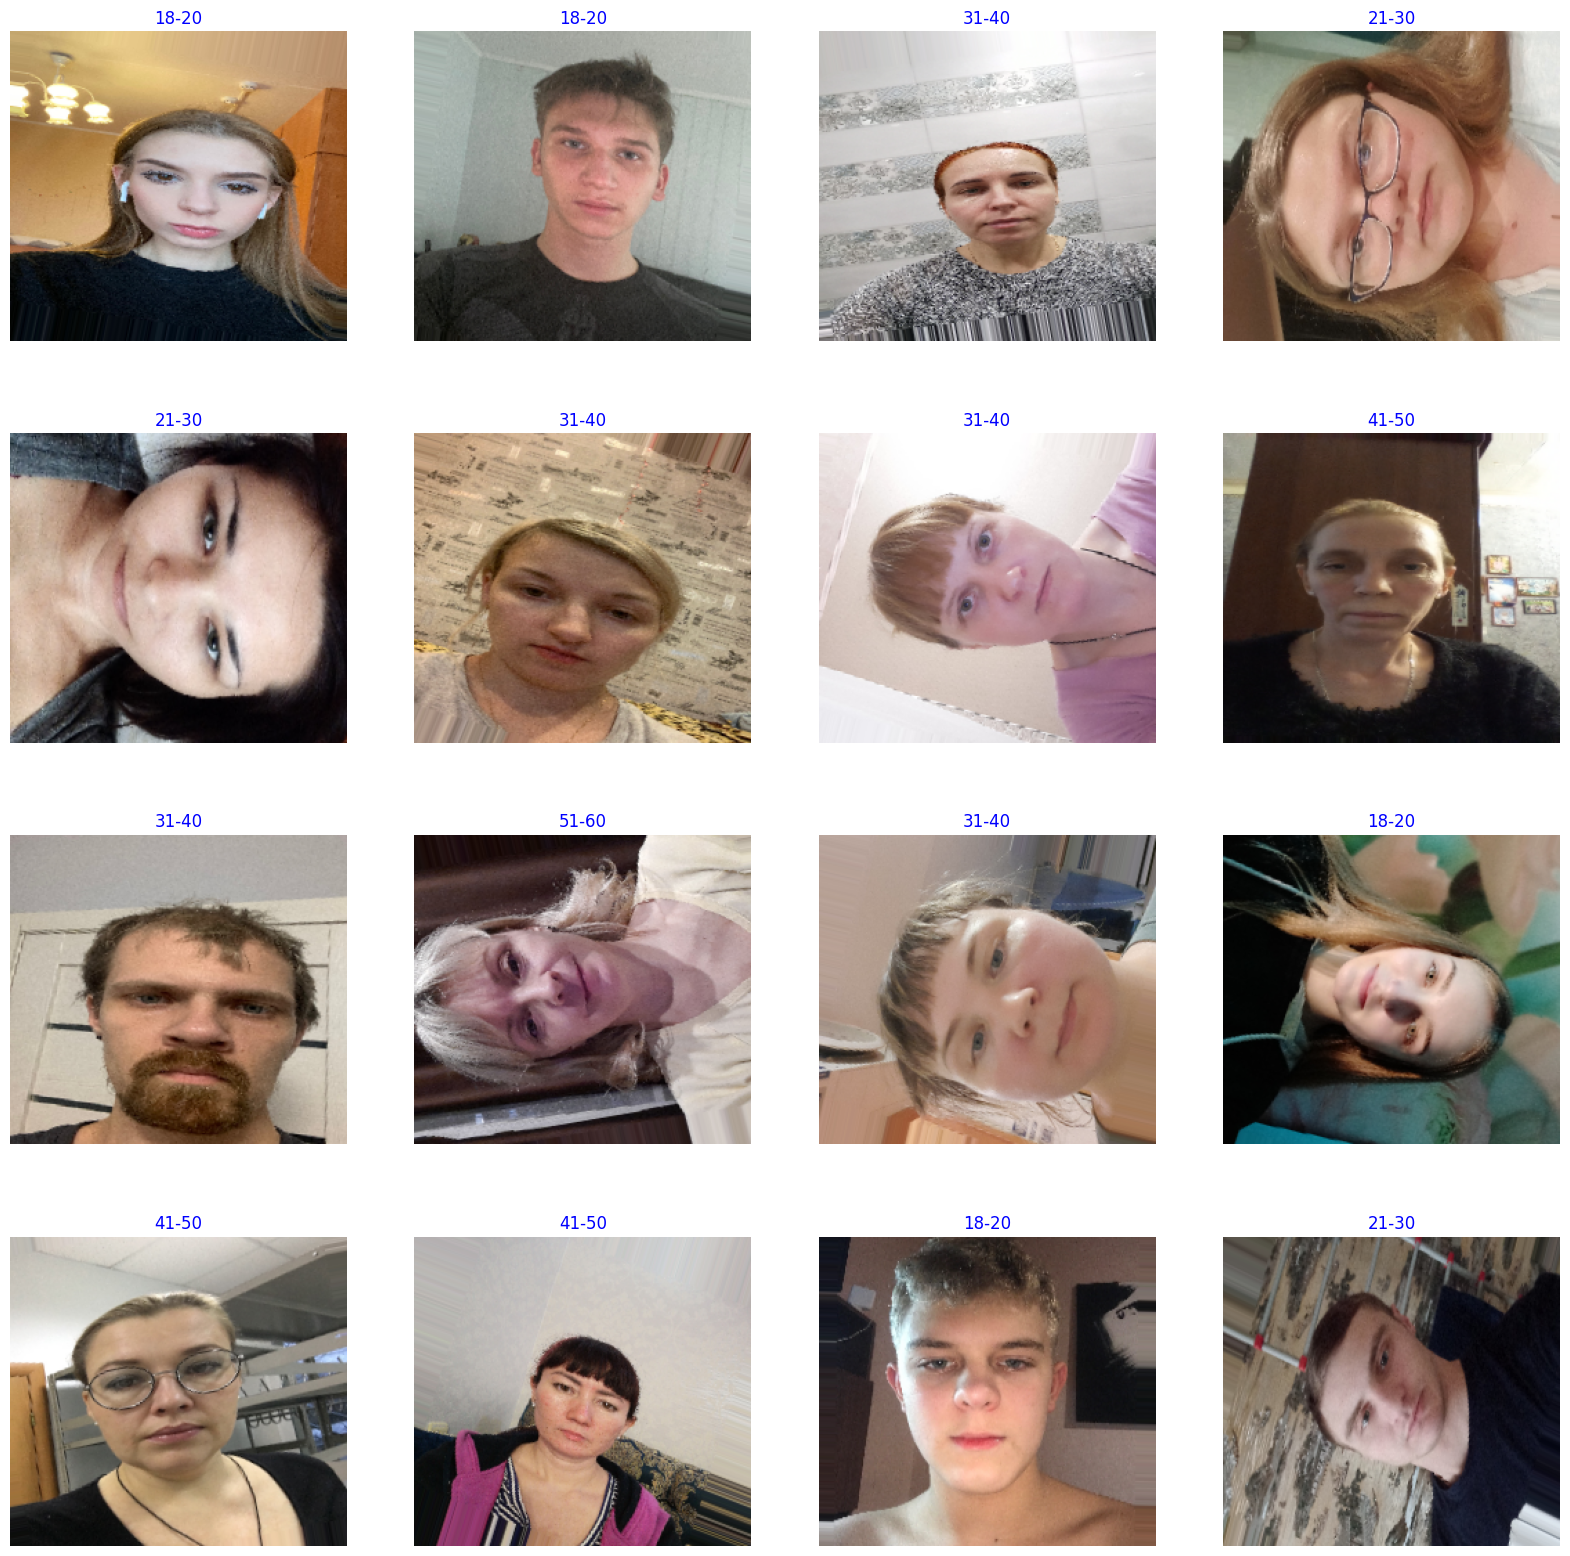

In [ ]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show();

In [ ]:
img_shape = (img_size[0],img_size[1],3)
num_class = len(classes)

base_model1 = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet' ,
                                                               input_shape = img_shape, pooling= 'max')
model1 = Sequential([
    base_model1,
    BatchNormalization(),
    Dense(256, activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

model1.compile(Adam(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 1536)                │           6,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,184,436 (42.67 MB)

 Trainable params: 11,094,061 (42.32 MB)

 Non-trainable params: 90,375 (353.03 KB)

In [ ]:
base_model2 = tf.keras.applications.MobileNetV2(include_top = False , weights = 'imagenet' ,
                                                               input_shape = img_shape,)
model2 = Sequential([
    base_model2,
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(256, activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

model2.compile(Adam(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 7, 8, 1280)          │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,592,325 (9.89 MB)

 Trainable params: 2,555,653 (9.75 MB)

 Non-trainable params: 36,672 (143.25 KB)

In [ ]:
check=tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/mipt/model/keras.keras', # Changed the file extension to .keras
    monitor='loss',
    save_best_only=True,
    mode='min',)

In [ ]:
epochs = 10
history = model1.fit(x= train_gen , epochs = epochs,  validation_data = valid_gen, callbacks=[check])

Epoch 1/10


2023-11-09 10:17:07.809518: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - 84s 2s/step - loss: 10.1473 - accuracy: 0.2480 - val_loss: 12.6051 - val_accuracy: 0.2500
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 8.5974 - accuracy: 0.7040 - val_loss: 12.6722 - val_accuracy: 0.1667
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 8.0847 - accuracy: 0.8560 - val_loss: 11.9855 - val_accuracy: 0.2500
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 7.8503 - accuracy: 0.8800 - val_loss: 11.2346 - val_accuracy: 0.2500
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 7.5691 - accuracy: 0.9520 - val_loss: 10.5557 - val_accuracy: 0.4167
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 7.4427 - accuracy: 0.9440 - val_loss: 10.1183 - val_accuracy: 0.4167
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 7.2959 - accuracy: 0.9680 - val_loss: 9.7364 - val_accuracy: 0.4167
Epoch 8/10
8/8 [============================

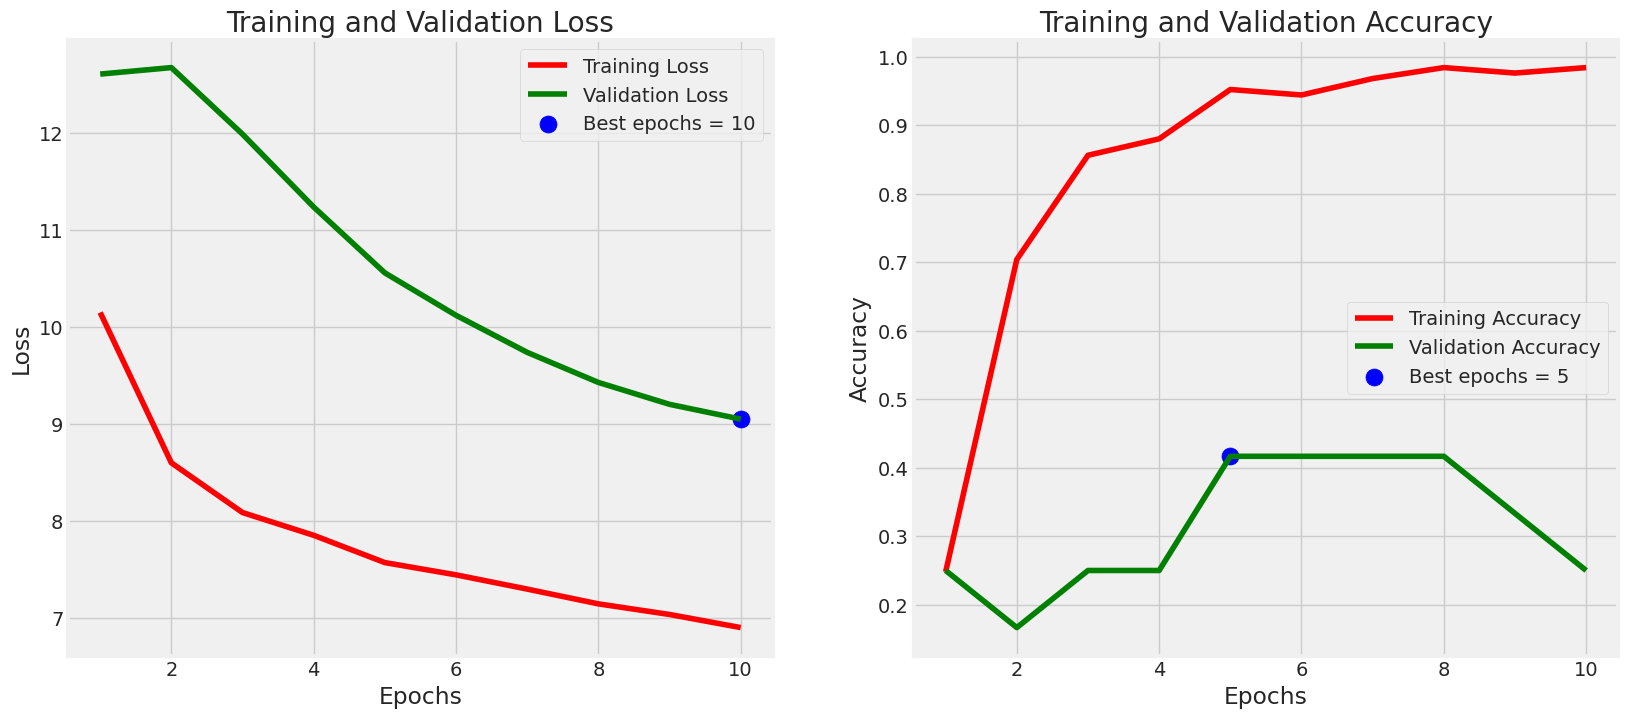

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

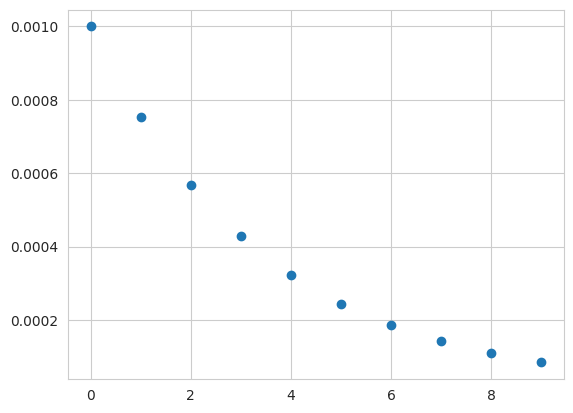

In [ ]:
epochs=10
def get_lr_callback(plot=False):
    lr_start   = 0.01
    lr_max     = 0.001 #* config.BATCH_SIZE
    lr_min     = 0.00001
    lr_ramp_ep = 0
    lr_sus_ep  = 0
    lr_decay   = .75

    def lrfn(epoch):
        if epoch < lr_ramp_ep:
            lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

        elif epoch < lr_ramp_ep + lr_sus_ep:
            lr = lr_max

        else:
            lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

        return lr

    if plot:
        epochs1 = list(range(epochs))
        learning_rates = [lrfn(x) for x in epochs1]
        plt.scatter(epochs1,learning_rates)
        plt.show()

    lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)
    return lr_callback

lr_shed=get_lr_callback(plot=True)

In [ ]:
check2=tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/mipt/model2/keras.keras', # Changed the file extension to .keras
    monitor='val_loss',
    save_best_only=True,
    mode='min',)

In [ ]:
epochs = 10
history = model2.fit(x= train_gen , epochs = epochs,  validation_data = valid_gen, callbacks=[check2, lr_shed])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 591ms/step - accuracy: 0.9536 - loss: 0.1574 - val_accuracy: 0.1765 - val_loss: 16.5250 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0007525.
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 440ms/step - accuracy: 0.9499 - loss: 0.1562 - val_accuracy: 0.1765 - val_loss: 17.2076 - learning_rate: 7.5250e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000566875.
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - accuracy: 0.9298 - loss: 0.2032 - val_accuracy: 0.1765 - val_loss: 16.9740 - learning_rate: 5.6687e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00042765625000000003.
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 296ms/step - accuracy: 0.9262 - loss: 0.1908 - val_accuracy: 0.1765 - val_loss: 13.7045 - learning_rate: 4.2766e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0003232421875.
Epoch 5/10
8/8 ━━━━━━━━

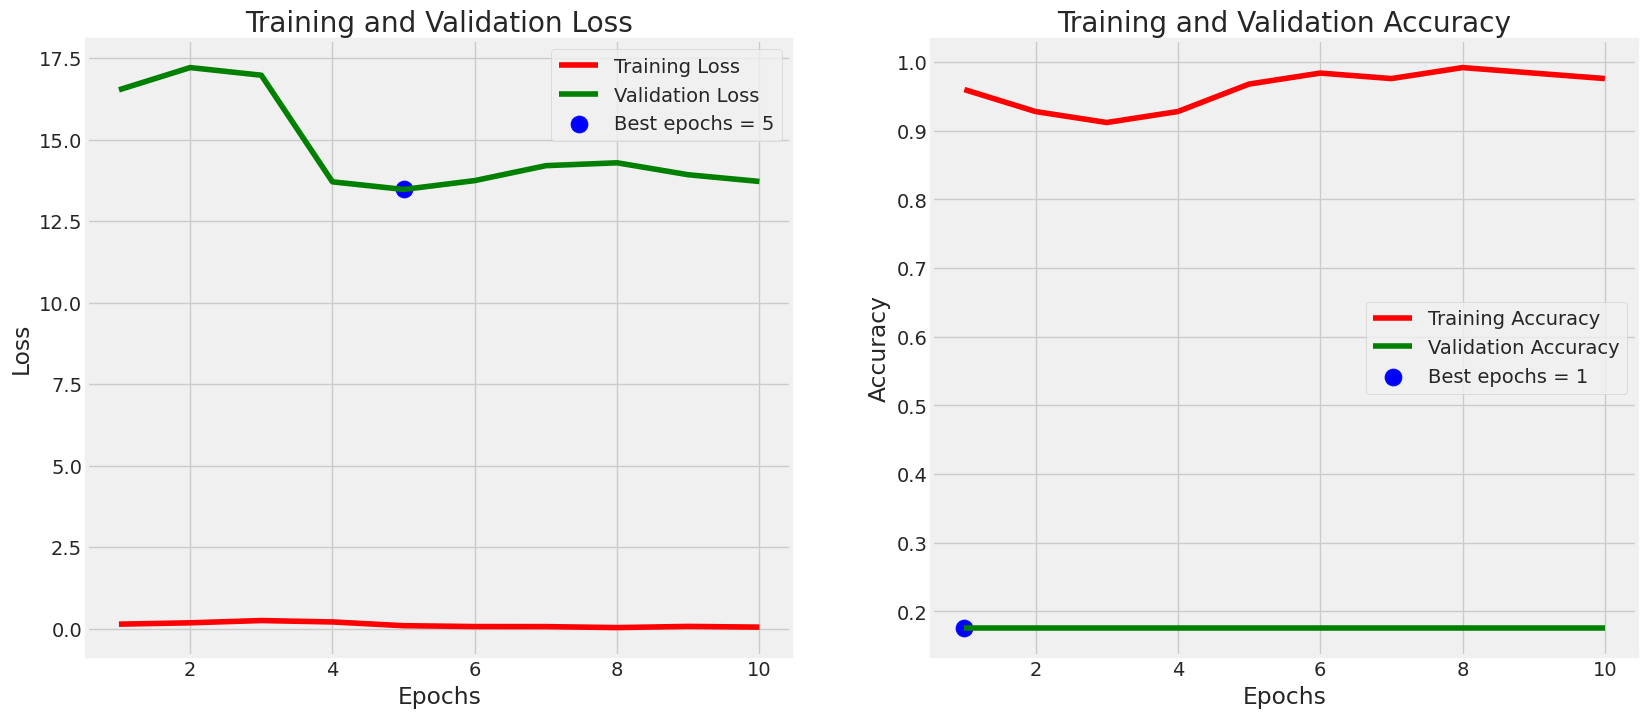

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [ ]:
train_score = model1.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model1.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model1.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 [==============================] - 1s 2ms/step - loss: 8.9854 - accuracy: 0.3077
Train Loss:  6.995179653167725
Train Accuracy:  0.9919999837875366
--------------------
Validation Loss:  9.047865867614746
Validation Accuracy:  0.25
--------------------
Test Loss:  8.985367774963379
Test Accuracy:  0.3076923191547394


In [ ]:
preds = model1.predict_generator(test_gen)

y_pred = np.argmax(preds,axis=1)

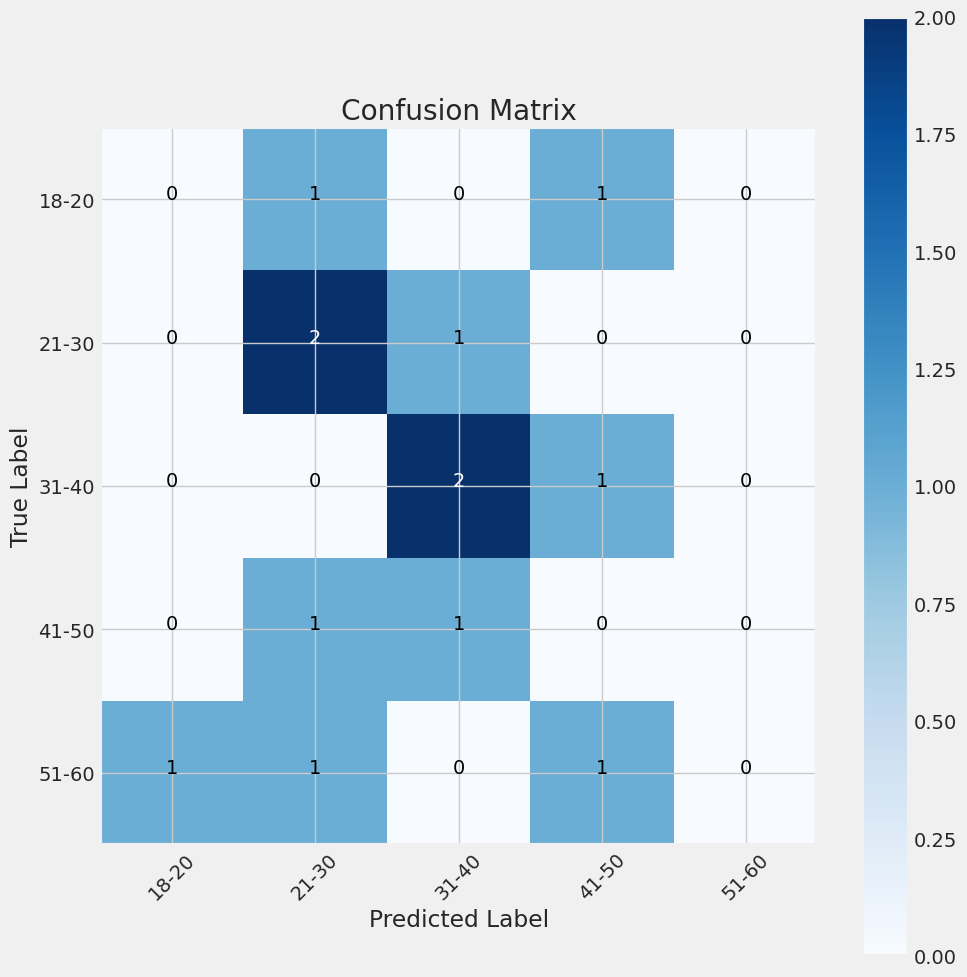

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
resize = 224
label = ("18-20","21-30","31-40","41-50","51-60")

In [ ]:
from google.colab import drive
drive.mount('/content/dd')

Mounted at /content/dd


In [ ]:
model = tf.keras.models.load_model('/content/dd/MyDrive/mipt/model/keras.keras')


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(224, 244, 3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size)
    print(classes[0])
    if classes[0][0]==classes[0].max():
      print('18-20')
    elif classes[0][1]==classes[0].max():
      print('21-30')
    elif classes[0][2]==classes[0].max():
      print('31-40')
    elif classes[0][3]==classes[0].max():
      print('41-50')
    elif classes[0][4]==classes[0].max():
      print('51-60')
    else:
      print('Это все вместе')

Saving 4b093ab36ee475dc7a29effe6eb90733.jpeg to 4b093ab36ee475dc7a29effe6eb90733.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[9.0153468e-01 2.4830390e-02 7.3344290e-02 1.8648208e-04 1.0410518e-04]
18-20
